In [1]:
from sklearn import datasets,datasets, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'axes.facecolor': 'lightblue', 'figure.facecolor': 'lightblue'})


def confusionMatrixAndAccuracyReport(Y_test, Y_pred):
    cm = metrics.confusion_matrix(Y_test, Y_pred)
    overallAccuracy = np.trace(cm)/sum(cm.flatten())

    classwiseAccuracy = np.zeros(len(cm))
    for n in range(len(cm)):
        for i in range(len(cm)):
            for j in range(len(cm)):
                if (i != n and j != n) or (i == n and j == n):
                    classwiseAccuracy[n] += cm[i][j]

    classwiseAccuracy /= sum(cm.flatten())

    plt.figure(figsize=(6, 6))
    plt.title('Accuracy Score: {0:3.3f}'.format(overallAccuracy), size=12)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    sns.heatmap(data=cm, annot=True, square=True,  cmap='Blues')

    plt.show()
    print('Overall Accuracy Score: {0:3.3f}'.format(overallAccuracy))
    print('Classwise Accuracy Score: {0}'.format(classwiseAccuracy))

In [3]:
# import dataset
iris = datasets.load_iris()

print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [4]:
# train test split dataset
x_train, x_test, y_train, y_test = train_test_split(iris.data[0:100], iris.target[0:100], test_size=0.2, shuffle=True, random_state=42)


Text(0, 0.5, 'petal width (cm)')

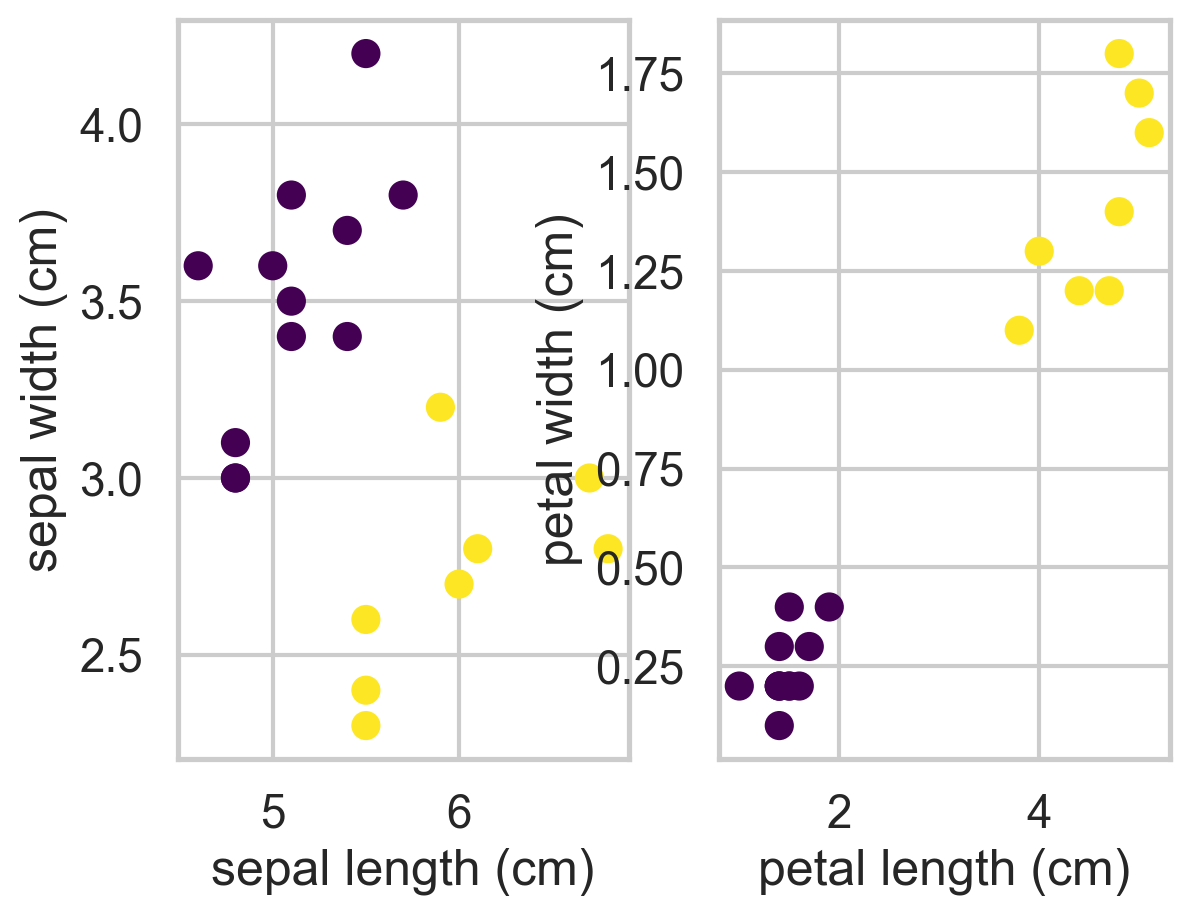

In [5]:
#data visualisation
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random
import seaborn
seaborn.set(style='whitegrid'); seaborn.set_context('talk')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.subplot(1, 2, 1)
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,cmap=cm.viridis)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]) 

plt.subplot(1, 2, 2)
plt.scatter(x_test[:,2],x_test[:,3],c=y_test,cmap=cm.viridis)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])

In [6]:
class Perceptron:
    def __init__(self,x_train,y_train):
        self.data = x_train
        self.y = y_train
        self.w=np.ones(4)

    def train(self, epoch):
        count=1
        correctClassified = 0
        print(self.w)
        while (correctClassified != len(self.data) and count < epoch): #Until everything is classified
          print(f'Iteration is : {count}')
          for sample in range(len(self.data)):
            x = np.append(self.data[sample,0:3],1)
            print(f'Sample is : {x}')
            print(f'Class is : {self.y[sample]}')
            wx = np.dot(np.transpose(self.w),x)
            print(f'Dot Product of W & X is : {wx}')
            if self.y[sample]==1: #Sample is positive 
              if wx >= 0: #WX >= 0
                correctClassified=correctClassified+1
                print("Positive Sample is correctly clasified")
              else: 
                  print("Positive Sample is classified negative")
                  self.w=self.w+x
                  print(f'Updated W is : {self.w}')
            else: #Sample is Negative 
                if wx < 0: # WX < 0
                  correctClassified=correctClassified+1
                  print("Negative Sample is Correctly classified")
                else: 
                  print("Negative Sample is classified positive")
                  self.w=self.w-x
                  print(f'Updated W is : {self.w}')
          count=count+1 
          if(correctClassified != len(self.data)):
              correctClassified=0
      
          print(self.w)   
          
    def predict(self,x_data):
        return np.where(np.dot(x_data,self.w.T)>0,1,0)

In [7]:
iris_perceptron = Perceptron(x_train=x_train,y_train=y_train)
iris_perceptron.train(2)
y_pred = iris_perceptron.predict(x_test)


[1. 1. 1. 1.]
Iteration is : 1
Sample is : [5.7 2.8 4.5 1. ]
Class is : 1
Dot Product of W & X is : 14.0
Positive Sample is correctly clasified
Sample is : [5.6 3.  4.1 1. ]
Class is : 1
Dot Product of W & X is : 13.7
Positive Sample is correctly clasified
Sample is : [5.  3.4 1.6 1. ]
Class is : 0
Dot Product of W & X is : 11.0
Negative Sample is classified positive
Updated W is : [-4.  -2.4 -0.6  0. ]
Sample is : [4.4 3.2 1.3 1. ]
Class is : 0
Dot Product of W & X is : -26.060000000000002
Negative Sample is Correctly classified
Sample is : [5.6 2.5 3.9 1. ]
Class is : 1
Dot Product of W & X is : -30.74
Positive Sample is classified negative
Updated W is : [1.6 0.1 3.3 1. ]
Sample is : [5.7 4.4 1.5 1. ]
Class is : 0
Dot Product of W & X is : 15.509999999999998
Negative Sample is classified positive
Updated W is : [-4.1 -4.3  1.8  0. ]
Sample is : [5.  3.5 1.3 1. ]
Class is : 0
Dot Product of W & X is : -33.21000000000001
Negative Sample is Correctly classified
Sample is : [5.7 2.9 4.2

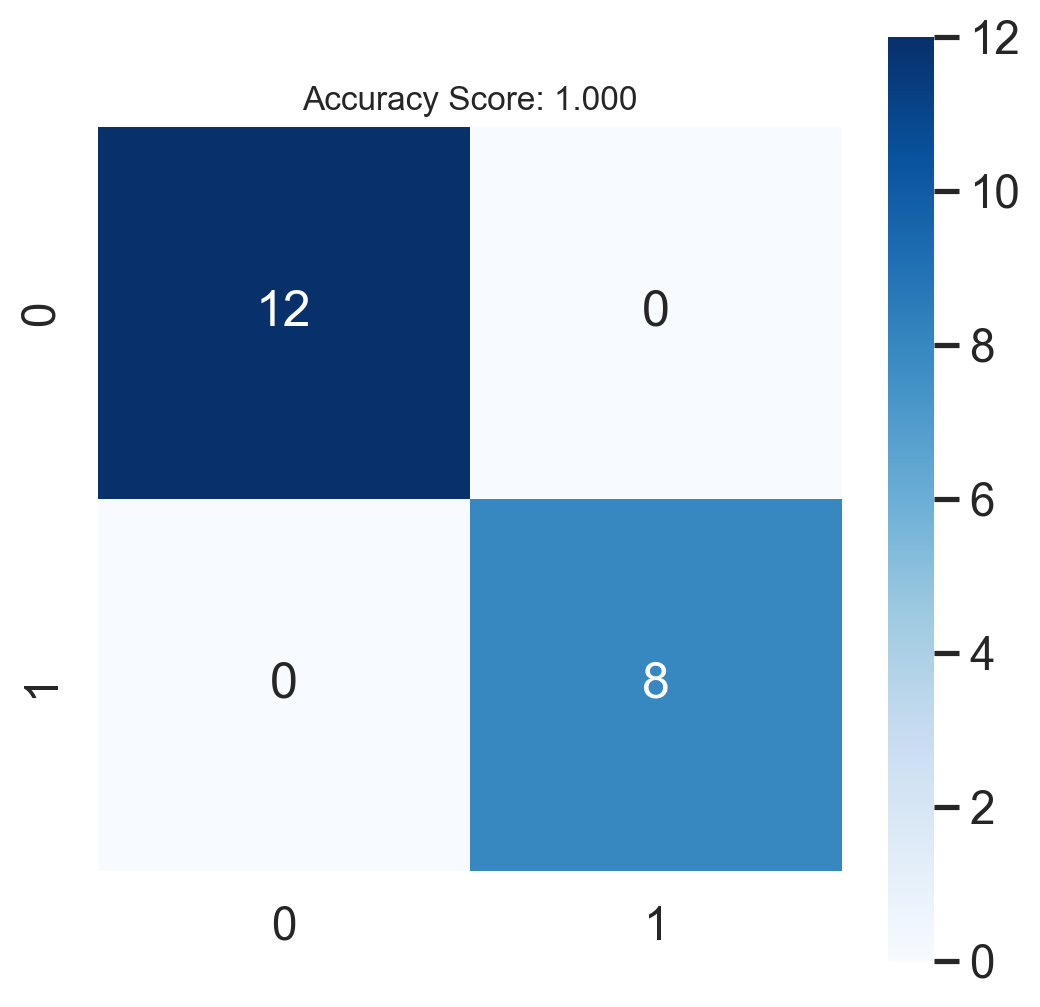

Overall Accuracy Score: 1.000
Classwise Accuracy Score: [1. 1.]


In [8]:
confusionMatrixAndAccuracyReport(y_test,y_pred)

# Question 2. 
## MLP implementation

In [13]:

from sklearn.preprocessing import StandardScaler

            
def pre_process_data(X_train_original,Y_train,X_test_original,Y_test):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train_original)

    mean = X_train_original.mean(axis=0)
    std = X_train_original.std(axis=0)

    mean = mean[:, None]
    std = std[:, None]

    X_train = X_train.transpose()

    X_test = X_test_original.transpose()

    Y_train = Y_train.transpose()
    Y_test = Y_test.transpose()

    print(X_train.shape)
    return X_train,Y_train,X_test,Y_test,mean,std

class MultiLayerPerceptron:
    
    def __init__(self,layer_nodes):
        self.L = len(layer_nodes)

        self.parameters = {}

        for l in range(1, self.L):
            self.parameters['W'+str(l)] = np.random.randn(layer_nodes[l],
                                                    layer_nodes[l-1])
            self.parameters['b'+str(l)] = np.zeros([layer_nodes[l], 1])


    def standardize(self,X, mean, std):
        X = (X-mean)/std
        return X

    def relu(self,x):
        return np.maximum(0, x)

    def sigmoid(self,x):
        return 1/(1+np.exp(-x))

    def deriv_relu(self,x):
        x = (x >= 0)
        return x

    def deriv_sigmoid(self,x):
        m = self.sigmoid(x)
        return m*(1-m)

    def forward_propagation(self,X):
        cache = {"A0": X,}
        L = len(self.parameters)//2
        for l in range(1, L+1):
            cache['Z'+str(l)] = np.dot(self.parameters['W'+str(l)], cache['A'+str(l-1)])+self.parameters['b'+str(l)]
            cache['A'+str(l)] = self.relu(cache['Z'+str(l)])
        return cache


    def compute_cost(self,Yhat, Y):
        return np.mean(np.power((Yhat-Y), 2))


    def backward_propagation(self,parameters, cache, Y):
        m = Y.shape[1]
        L = len(parameters)//2
        gradients = {}
        dA = 2*(cache['A'+str(L)]-Y)
        for l in range(0, L):
            dZ = dA*self.deriv_relu(cache['Z'+str(L-l)])
            gradients['dW'+str(L-l)] = (1/m)*np.dot(dZ, cache['A'+str(L-l-1)].transpose())
            gradients['db'+str(L-l)] = (1/m)*np.sum(dZ, axis=1, keepdims=True)
            dA = np.dot(parameters['W'+str(L-l)].transpose(), dZ)
        return gradients


    def updation(self,parameters, gradients, learning_rate=0.0025):
        L = len(parameters)//2
        for l in range(1, L+1):
            parameters['W'+str(l)] = parameters['W'+str(l)]-learning_rate*gradients['dW'+str(l)]
            parameters['b'+str(l)] = parameters['b'+str(l)]-learning_rate*gradients['db'+str(l)]
        return parameters


    def model_training(self,X_train,Y_train,mean,std):
        self.mean=mean
        self.std=std
        for epoch in range(10000):

            cache = self.forward_propagation(X_train)
            #print(f'epoch #{epoch}: cache => {cache.keys()}')
            gradients = self.backward_propagation( self.parameters, cache, Y_train)
            self.parameters = self.updation( self.parameters, gradients)

            if (epoch % 1000 == 0):
                cost = self.compute_cost(cache["A3"], Y_train)
                print(cost)

    def predict(self, X):
        X_test = self.standardize(X, self.mean, self.std)
        output = self.forward_propagation(X_test)
        return output["A"+str(self.L-1)]

### MLP driver code

In [48]:
import pandas as pd

X = pd.DataFrame(iris.data, columns=iris.feature_names)
Y = iris.target
Y = Y[:, None]


X_train_original, X_test_original, Y_train, Y_test = train_test_split(
    X, Y, train_size=0.8, random_state=True)
X_train,Y_train,X_test,Y_test,mean,std = pre_process_data(X_train_original, Y_train, X_test_original, Y_test)

# Defining Layers
mlp_classifier = MultiLayerPerceptron([X_train.shape[0], 4, 5, 3])


(4, 120)


C:\Users\debon\AppData\Local\Temp\ipykernel_11312\1436670674.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mean = mean[:, None]
C:\Users\debon\AppData\Local\Temp\ipykernel_11312\1436670674.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  std = std[:, None]


In [49]:
mlp_classifier.model_training(X_train,Y_train,mean,std)


final = mlp_classifier.forward_propagation(X_train)
ycap = final["A3"]
m = mlp_classifier.compute_cost(ycap, Y_train)
print("Train accuracy", 1-m)

Yhat = mlp_classifier.predict(X_test_original.T)
c = mlp_classifier.compute_cost(Yhat, Y_test)
print("Test Accuracy", 1-c)

1.4321138611802502
0.07801185514844253
0.059370044058797075
0.05274633529102167
0.049378209480640665
0.04724019433537756
0.045621555045643504
0.044271652376872125
0.04308225166034935
0.04199832318216145
Train accuracy 0.9590029298198043
Test Accuracy 0.9597662655615274


#### Final Weightages and biases

In [37]:
mlp_classifier.parameters

{'W1': array([[-0.98885227, -1.01917339,  0.48110982,  0.05258355],
        [-0.20307571, -0.06897137,  1.17729151,  1.07192375],
        [-0.14824563, -0.02112605,  0.77653502,  0.68832605],
        [-0.66894827,  0.45478427, -0.1129538 , -0.30748736]]),
 'b1': array([[ 0.2044274 ],
        [-0.86207989],
        [-0.9255165 ],
        [-0.19077622]]),
 'W2': array([[-0.02651323, -0.12774476, -2.58563074,  1.24640544],
        [-1.53339271, -0.09397867, -0.64876522, -0.35854237],
        [ 0.00775623,  0.98169419, -1.41225693, -0.89826066],
        [-0.62822013, -0.49589076,  0.6951747 , -1.14284885],
        [-0.86181062, -0.19951521, -1.72728729,  0.13021338]]),
 'b2': array([[-1.74737818e-07],
        [ 7.61209482e-03],
        [ 5.15590913e-01],
        [-1.39781912e-05],
        [-2.62070949e-01]]),
 'W3': array([[ 0.03653242,  1.29564816, -0.4599343 , -0.19321069,  1.69008845],
        [-0.23534821,  0.43395064,  1.58621032, -0.13841625,  1.4614615 ],
        [-1.01430892,  1.61

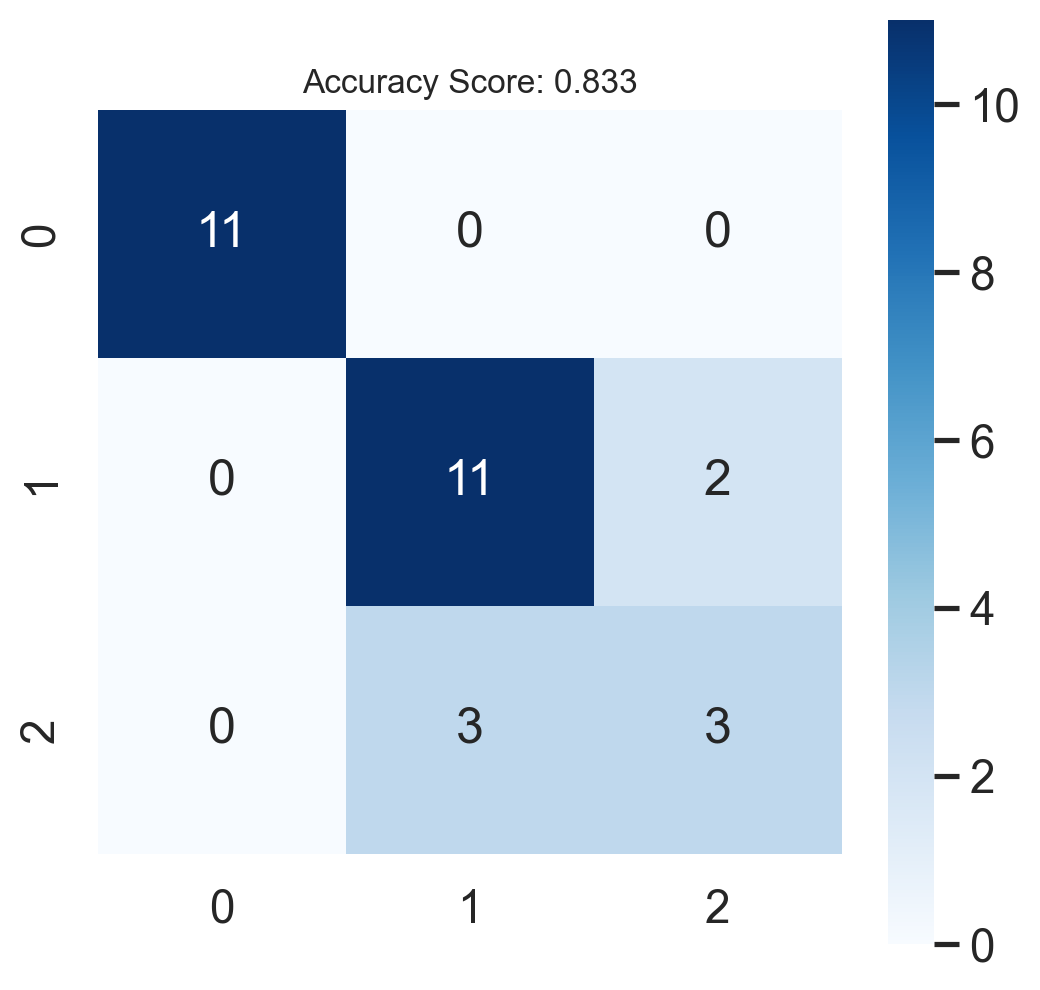

Overall Accuracy Score: 0.833
Classwise Accuracy Score: [1.         0.83333333 0.83333333]


In [38]:
confusionMatrixAndAccuracyReport(Y_test.T.squeeze(),np.argmax(Yhat.T,axis=1))